## Sketch of retrieval setup

In [1]:
import os
import numpy as np

os.environ["LIRAS_PATH"] = "/home/simonpf/src/joint_flight"
os.environ["ARTS_DATA_PATH"] = "/home/simonpf/src/arts_xml"
os.environ["ARTS_BUILD_PATH"] = "/home/simonpf/build/arts_fast"

from IPython import get_ipython
ip = get_ipython()
if not ip is None:
    ip.magic("%load_ext autoreload")
    ip.magic("%autoreload 2")

from parts.utils.data_providers import NetCDFDataProvider
import mcrf.liras.setup
import mcrf.liras
from   mcrf.retrieval        import CloudRetrieval
from   mcrf.sensors          import mwi, ici, lcpr
from   mcrf.liras  import snow, rh_a_priori, cloud_water_a_priori, h2o_a_priori
from   mcrf.liras.single_species import ice, rain
from   mcrf.liras.model_data import ModelDataProvider

%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
#
# Input data.
#

filename = os.path.join(mcrf.liras.liras_path, "data", "forward_simulations_a_noise.nc")
offsets = {"a" : 3000,
           "b" : 2200}
scene = filename.split("_")[-2]
offset = offsets[scene]
observations = NetCDFDataProvider(filename)
observations.add_offset("profile", -offset)
shape = "8-ColumnAggregate"

#
# Create the data provider.
#

ip = offset + 200
data_provider = ModelDataProvider(99,
                                  ice_psd    = ice.psd,
                                  snow_psd   = snow.psd,
                                  scene = scene.upper())
#
# Define hydrometeors and sensors.
#

#hydrometeors = [snow, ice, rain]
hydrometeors = [ice, rain]
sensors      = [lcpr]

#
# Add a priori providers.
#

observation_error = mcrf.liras.ObservationError(sensors,
                                                forward_model_error = True,
                                                scene = scene)
observation_error.noise_scaling["lcpr"] = 2.0

data_provider.add(ice.a_priori[0])
data_provider.add(ice.a_priori[1])
data_provider.add(snow.a_priori[0])
data_provider.add(snow.a_priori[1])
data_provider.add(rain.a_priori[0])
data_provider.add(rain.a_priori[1])
data_provider.add(rh_a_priori)
data_provider.add(cloud_water_a_priori)
data_provider.add(observation_error)
data_provider.add(observations)


#
# Run the retrieval.
#

retrieval = CloudRetrieval(hydrometeors, sensors, data_provider)
retrieval.setup()
retrieval.run(ip)

ARTS[94651546860032]: Executing /home/simonpf/src/arts_wip/controlfiles/general/general.arts
ARTS[94651546860032]: {
ARTS[94651546860032]: - verbosityInit
ARTS[94651546860032]: - ArrayOfStringSet
ARTS[94651546860032]: - MatrixSet
ARTS[94651546860032]: - Tensor4SetConstant
ARTS[94651546860032]: - ArrayOfStringSet
ARTS[94651546860032]: - Touch
ARTS[94651546860032]: - Tensor3SetConstant
ARTS[94651546860032]: - ArrayOfStringSet
ARTS[94651546860032]: - MatrixSet
ARTS[94651546860032]: - NumericSet
ARTS[94651546860032]: - ArrayOfStringSet
ARTS[94651546860032]: - Tensor3SetConstant
ARTS[94651546860032]: - Tensor3SetConstant
ARTS[94651546860032]: - Tensor3SetConstant
ARTS[94651546860032]: - Tensor3SetConstant
ARTS[94651546860032]: - Tensor3SetConstant
ARTS[94651546860032]: - Tensor3SetConstant
ARTS[94651546860032]: - IndexSet
ARTS[94651546860032]: - IndexSet
ARTS[94651546860032]: - IndexSet
ARTS[94651546860032]: - IndexSet
ARTS[94651546860032]: - FlagOff
ARTS[94651546860032]: - output_file_form

ARTS[94651546860032]: - ReadXML

ARTS[94651546860032]: - ReadXML

ARTS[94651546860032]: - Append

ARTS[94651546860032]: - Append

ARTS[94651546860032]: - Delete

ARTS[94651546860032]: - Delete

ARTS[94651546860032]: - Append

ARTS[94651546860032]: - Append

ARTS[94651546860032]: - Append

ARTS[94651546860032]: - ReadXML

ARTS[94651546860032]: - ReadXML

ARTS[94651546860032]: - Append

ARTS[94651546860032]: - Append

ARTS[94651546860032]: - Delete

ARTS[94651546860032]: - Delete

ARTS[94651546860032]: - Append

ARTS[94651546860032]: - Append

ARTS[94651546860032]: - Append

ARTS[94651546860032]: - Copy

ARTS[94651546860032]: - TessemNNReadAscii

ARTS[94651546860032]: - TessemNNReadAscii

ARTS[94651546860032]: - Copy

ARTS[94651546860032]: - Copy

ARTS[94651546860032]: - Copy

ARTS[94651546860032]: - Copy

ARTS[94651546860032]: - Copy

ARTS[94651546860032]: - ReadXML

ARTS[94651546860032]: - Copy

ARTS[94651546860032]: - Copy

ARTS[94651546860032]: - Copy

ARTS[94651546860032]: - Copy

A

In [4]:
%env LIRAS_PATH=/old/projects/LIRAS/Development/liras
%load_ext autoreload
%autoreload 2
from mcrf.utils.setup_notebook import *
from netCDF4 import Dataset
from mcrf.liras import liras_path
from mcrf.liras.model_data import ModelDataProvider
from mcrf.liras.results import get_results, get_reference_data

env: LIRAS_PATH=/old/projects/LIRAS/Development/liras
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
reference_a = get_reference_data(scene = "a", i_start = 2800, i_end = 3600)
reference_b = get_reference_data(scene = "b", i_start = 2200, i_end = 3000)

/home/simonpf/src/parts/parts/scattering/psd/my05.py:208: RuntimeWarning: divide by zero encountered in true_divide
  / gamma((nu + 1) / mu)
/home/simonpf/src/parts/parts/scattering/psd/my05.py:208: RuntimeWarning: invalid value encountered in true_divide
  / gamma((nu + 1) / mu)
/home/simonpf/src/parts/parts/scattering/psd/my05.py:280: RuntimeWarning: divide by zero encountered in power
  m = n0 / mu * lmbd ** (-(nu + p + 1) / mu) * gamma((nu + 1.0 + p) / mu)
/home/simonpf/src/parts/parts/scattering/psd/my05.py:280: RuntimeWarning: invalid value encountered in multiply
  m = n0 / mu * lmbd ** (-(nu + p + 1) / mu) * gamma((nu + 1.0 + p) / mu)
/home/simonpf/src/parts/parts/scattering/psd/d14.py:412: RuntimeWarning: invalid value encountered in true_divide
  dm = m4 / m3
/home/simonpf/src/parts/parts/scattering/psd/d14.py:414: RuntimeWarning: invalid value encountered in true_divide
  n0 = 4.0 ** 4 / (np.pi * self.rho) * md / dm ** 4


In [6]:
hmcs = [[reference_a[k] for k in ["iwc", "swc", "gwc", "hwc", "lwc", "rwc"]]]
hmcs += [[reference_b[k] for k in ["iwc", "swc", "gwc", "hwc", "lwc", "rwc"]]]

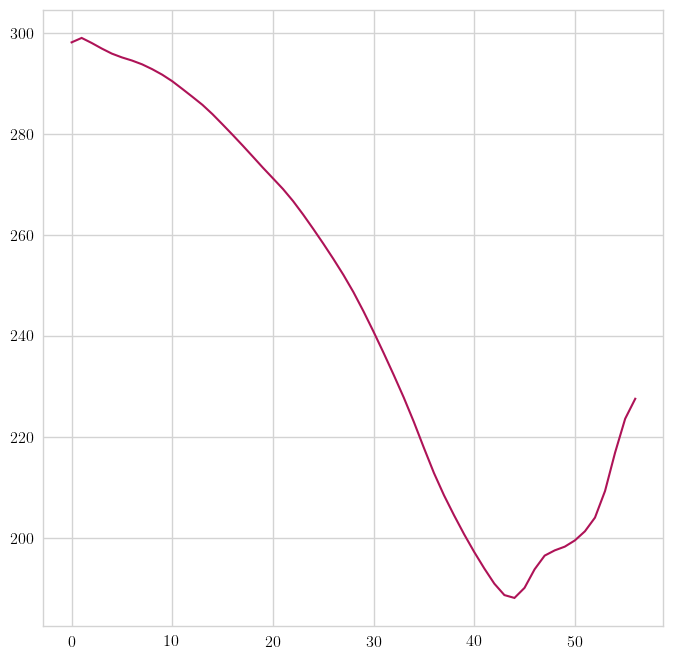

In [203]:
plt.plot(t_avg)

In [210]:
patches.Rectangle?

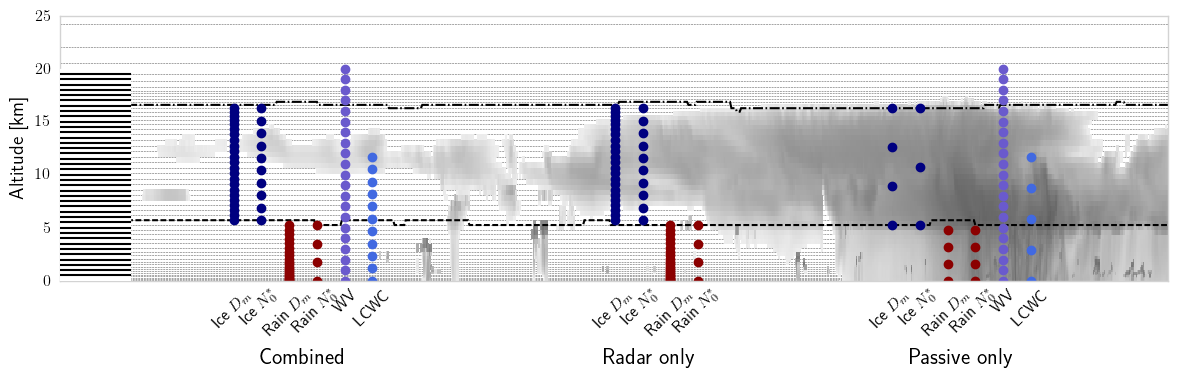

In [304]:
from matplotlib.colors import LogNorm
from matplotlib.cm import bone_r, Greys
from matplotlib.ticker import FixedLocator, FixedFormatter
from matplotlib import rcParams
from matplotlib import patches

rcParams["ytick.left"] = False
rcParams["xtick.bottom"] = False

f, ax = plt.subplots(1, 1, figsize = (12, 4))
x  = reference_a["lat"]
y  = reference_a["z"] / 1e3
z = sum(hmcs[0])
z[z < 5e-6] = np.nan
ax.pcolormesh(x, y, z.T, norm = LogNorm(1e-6, 1e-1), cmap = Greys)


for z in y:
    ax.axhline(z, ls = "--", c = "grey", lw = 0.5, zorder = -10)
    
ax.set_ylabel("Altitude [km]")

markersize = 6

###############################################################################################################################################################
# Retrieval domain
###############################################################################################################################################################

# Melting layer
t = reference_a["temperature"]
z_fl = np.zeros(800)
for i in range(800):
    z_fl[i] = y[np.where(t[i, :] < 273.15)[0][0]]

# Tropopause
z_tp = np.zeros(800)
for i in range(800):
    ti = t[i, :]
    t_avg = 0.5 * (ti[1:] + ti[:-1])
    lr    = - np.diff(ti)
    tp = np.where(np.logical_and(lr < 0, t_avg < 220))[0]
    inds  = np.ones(ti.size, dtype = np.bool)
    if len(tp > 0):
        j     = np.where(np.logical_and(lr < 0, t_avg < 220))[0][0]
        inds[j : inds.size] = False
    ind = np.where(~inds)[0][0]
    z_tp[i] = y[ind]
    
ax.plot(x, z_fl, ls = "--", c = "k")
ax.plot(x, z_tp, ls = "-.", c = "k")

###############################################################################################################################################################
# Radar bins
###############################################################################################################################################################

rect = patches.Rectangle((x[0],0.0), x[50] - x[0], 20, zorder=20,
                         linewidth=1,edgecolor='white',facecolor='white')
ax.add_patch(rect)
for rb in np.arange(500, 20e3, 500):
    ax.plot([x[0], x[50]], [rb/1e3, rb/1e3], ls = "-", c = "k", zorder = 21)


###############################################################################################################################################################
# Combined
###############################################################################################################################################################

# Ice D_m
i = 125
z_ice_dm = y[ice.a_priori[1].mask(data_provider, ip)]
x_ice_dm = np.array([x[i]] * 23)
ax.plot(x_ice_dm, z_ice_dm, marker = "o", markersize = markersize, ls = "",c = "navy")
# Ice N_0
i += 20
z_ice_n0 = np.linspace(z_ice_dm[0], z_ice_dm[-1], 10)
x_ice_n0 = np.array([x[i]] * z_ice_n0.size)
ax.plot(x_ice_n0, z_ice_n0, marker = "o", markersize = markersize, ls = "", c= "navy")


# Rain_ D_m
i += 20
z_rain_dm = y[rain.a_priori[1].mask(data_provider, ip)]
x_rain_dm = np.array([x[i]] * z_rain_dm.size)
ax.plot(x_rain_dm, z_rain_dm, marker = "o", markersize = markersize, ls = "", c="darkred")
# Rain N_0
i += 20
z_rain_n0 = np.linspace(z_rain_dm[0], z_rain_dm[-1], 4)
x_rain_n0 = np.array([x[i]] * z_rain_n0.size)
ax.plot(x_rain_n0, z_rain_n0, marker = "o", markersize = markersize, ls = "", c="darkred")

# Humdity
i += 20
z_rh = np.linspace(0, 20, 21)
x_rh = np.array([x[i]] * z_rh.size)
ax.plot(x_rh, z_rh, marker = "o", markersize = markersize, ls = "", c="slateblue")

# Liquid cloud
i += 20
z_cw = y[cloud_water_a_priori.mask(data_provider, ip)]
z_cw = np.linspace(z_cw[0], z_cw[-1], 11)

x_cw = np.array([x[i]] * z_cw.size)
ax.plot(x_cw, z_cw, marker = "o", markersize = markersize, ls = "", c="royalblue")

###############################################################################################################################################################
# Radar only
###############################################################################################################################################################

# Ice D_m
i = 400
z_ice_dm = y[ice.a_priori[1].mask(data_provider, ip)]
x_ice_dm = np.array([x[i]] * 23)
ax.plot(x_ice_dm, z_ice_dm, marker = "o", markersize = markersize, ls = "",c = "navy")
# Ice N_0
i += 20
z_ice_n0 = np.linspace(z_ice_dm[0], z_ice_dm[-1], 10)
x_ice_n0 = np.array([x[i]] * z_ice_n0.size)
ax.plot(x_ice_n0, z_ice_n0, marker = "o", markersize = markersize, ls = "", c= "navy")


# Rain_ D_m
i += 20
z_rain_dm = y[rain.a_priori[1].mask(data_provider, ip)]
x_rain_dm = np.array([x[i]] * z_rain_dm.size)
ax.plot(x_rain_dm, z_rain_dm, marker = "o", markersize = markersize, ls = "", c="darkred")
# Rain N_0
i += 20
z_rain_n0 = np.linspace(z_rain_dm[0], z_rain_dm[-1], 4)
x_rain_n0 = np.array([x[i]] * z_rain_n0.size)
ax.plot(x_rain_n0, z_rain_n0, marker = "o", markersize = markersize, ls = "", c="darkred")

ax.set_xticks([])
ax.grid(None)




###############################################################################################################################################################
# Passive only
###############################################################################################################################################################

from mcrf.liras.passive_only import rh_a_priori, cloud_water_a_priori
from mcrf.liras.passive_only_single_species import (rain_dm_a_priori, rain_n0_a_priori,
                                                    ice_dm_a_priori, ice_n0_a_priori)

# Ice D_m
i = 600
z_ice_dm = y[ice_dm_a_priori.mask(data_provider, ip)]
z_ice_dm = np.linspace(z_ice_dm[0], z_ice_dm[-1], 4)
x_ice_dm = np.array([x[i]] * z_ice_dm.size)
ax.plot(x_ice_dm, z_ice_dm, marker = "o", markersize = markersize, ls = "",c = "navy")
# Ice N_0
i += 20
z_ice_n0 = y[ice_dm_a_priori.mask(data_provider, ip)]
z_ice_n0 = np.linspace(z_ice_dm[0], z_ice_dm[-1], 3)
x_ice_n0 = np.array([x[i]] * z_ice_n0.size)
ax.plot(x_ice_n0, z_ice_n0, marker = "o", markersize = markersize, ls = "", c= "navy")


# Rain_ D_m
i += 20
z_rain_dm = y[rain_dm_a_priori.mask(data_provider, ip)]
z_rain_dm = np.linspace(z_rain_dm[0], z_rain_dm[-1], 4)
x_rain_dm = np.array([x[i]] * z_rain_dm.size)
ax.plot(x_rain_dm, z_rain_dm, marker = "o", markersize = markersize, ls = "", c="darkred")

# Rain N_0
i += 20
z_rain_n0 = y[rain_n0_a_priori.mask(data_provider, ip)]
z_rain_n0 = np.linspace(z_rain_n0[0], z_rain_n0[-1], 4)
x_rain_n0 = np.array([x[i]] * z_rain_n0.size)
ax.plot(x_rain_n0, z_rain_n0, marker = "o", markersize = markersize, ls = "", c="darkred")

# Humdity
i += 20
z_rh = np.linspace(0, 20, 21)
x_rh = np.array([x[i]] * z_rh.size)
ax.plot(x_rh, z_rh, marker = "o", markersize = markersize, ls = "", c="slateblue")

# Liquid cloud
i += 20
z_cw = y[cloud_water_a_priori.mask(data_provider, ip)]
z_cw = np.linspace(z_cw[0], z_cw[-1], 5)

x_cw = np.array([x[i]] * z_cw.size)
ax.plot(x_cw, z_cw, marker = "o", markersize = markersize, ls = "", c="royalblue")

ax.set_xticks([])
ax.grid(None)

###############################################################################################################################################################
# Ticks
###############################################################################################################################################################

inds = [125 + i for i in range(0, 110, 20)]
inds += [400 + i for i in range(0, 70, 20)]
inds += [600 + i for i in range(0, 110, 20)]
xs = x[inds]
labels = ["Ice $D_m$", "Ice $N_0^*$", "Rain $D_m$", "Rain $N_0^*$", "WV", "LCWC"]

min_locator = FixedLocator(x[inds])
min_formatter = FixedFormatter(labels + labels[:4] + labels)
maj_locator = FixedLocator(x[[175, 425, 650]])
maj_formatter = FixedFormatter(["Combined", "Radar only", "Passive only"])

ax.xaxis.set_minor_locator(min_locator)
ax.xaxis.set_minor_formatter(min_formatter)
ax.xaxis.set_major_locator(maj_locator)
ax.xaxis.set_major_formatter(maj_formatter)
ax.set_ylim([0, 25])

ax.xaxis.set_tick_params("major", labelrotation = 0, labelsize = 16, pad = 45)
ax.xaxis.set_tick_params("minor", labelrotation = 45)

plt.tight_layout()
f.savefig("../../plots/retrieval_sketch.png", dpi = 300, bbox_inches = "tight")

In [312]:
iwc

NameError: name 'iwc' is not defined

In [327]:
np.linspace(200, 300 11)

SyntaxError: invalid syntax (<ipython-input-327-4f8379d305de>, line 1)

/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'level'
  """
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'level'
  


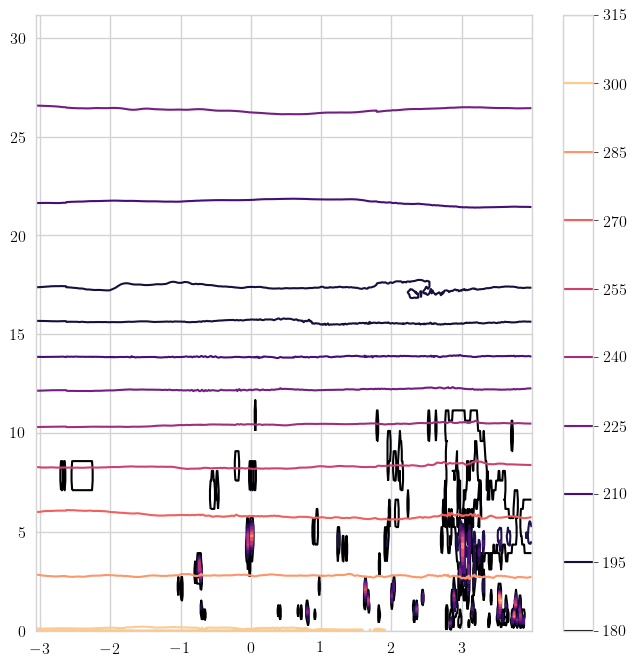

In [328]:
t = reference_a["temperature"]
clwc = reference_a["lwc"]
z = sum(hmcs[0])
z[z < 5e-6] = np.nan
plt.contour(x, y, clwc.T, level = np.logspace(-6, -2, 5))
plt.contour(x, y, t.T, level = np.linspace(200, 300, 11))
plt.colorbar()

In [164]:
inds

[233, 253, 273, 293, 313, 333, 466, 486, 506, 526, 546, 566]

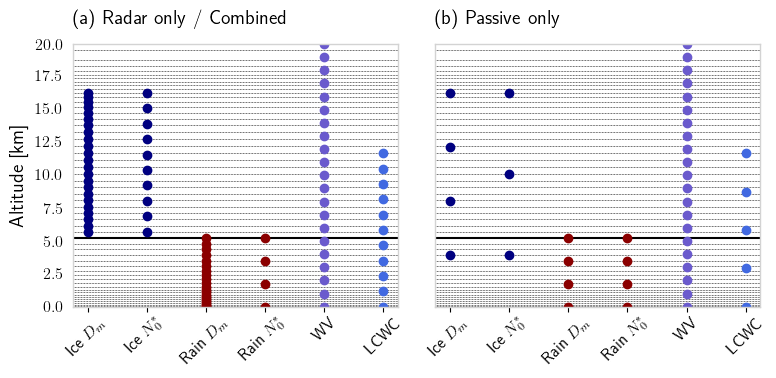

In [151]:
rcParams["ytick.left"] = False
rcParams["xtick.bottom"] = True

f, axs = plt.subplots(1, 2, figsize = (8, 4))

################################################################################
# Radar only, combined
################################################################################
ax = axs[0]

i = 200

for z in y:
    ax.axhline(z, ls = ":", c = "k", lw = 0.5, zorder = -10)

# Melting layer
t = reference_a["temperature"]
z_fl = np.zeros(800)
for i in range(800):
    z_fl[i] = y[np.where(t[i, :] <= 273.15)[0][0]]
ax.axhline(z_fl[i], c = "k")

# Ice D_m
i = 200
z_ice_dm = y[ice.a_priori[1].mask(data_provider, ip)]
x_ice_dm = np.array([x[i]] * 23)
ax.plot(x_ice_dm, z_ice_dm, marker = "o", markersize = 6, ls = "",c = "navy")
# Ice N_0
i = 220
z_ice_n0 = np.linspace(z_ice_dm[0], z_ice_dm[-1], 10)
x_ice_n0 = np.array([x[i]] * z_ice_n0.size)
ax.plot(x_ice_n0, z_ice_n0, marker = "o", markersize = 6, ls = "", c= "navy")


# Rain_ D_m
i = 240
z_rain_dm = y[rain.a_priori[1].mask(data_provider, ip)]
x_rain_dm = np.array([x[i]] * z_rain_dm.size)
ax.plot(x_rain_dm, z_rain_dm, marker = "o", markersize = 6, ls = "", c="darkred")
# Rain N_0
i = 260
z_rain_n0 = np.linspace(z_rain_dm[0], z_rain_dm[-1], 4)
x_rain_n0 = np.array([x[i]] * z_rain_n0.size)
ax.plot(x_rain_n0, z_rain_n0, marker = "o", markersize = 6, ls = "", c="darkred")

# Humdity
i = 280
z_rh = np.linspace(0, 20, 21)
x_rh = np.array([x[i]] * z_rh.size)
ax.plot(x_rh, z_rh, marker = "o", markersize = 6, ls = "", c="slateblue")

# Liquid cloud
i = 300
z_cw = y[cloud_water_a_priori.mask(data_provider, ip)]
z_cw = np.linspace(z_cw[0], z_cw[-1], 11)

x_cw = np.array([x[i]] * z_cw.size)
ax.plot(x_cw, z_cw, marker = "o", markersize = 6, ls = "", c="royalblue")

ax.set_xticks([])
ax.grid(None)

locator = FixedLocator(x[range(200, 320, 20)])
ax.xaxis.set_major_locator(locator)
ax.set_ylim([0, 20])
labels = ["Ice $D_m$", "Ice $N_0^*$", "Rain $D_m$", "Rain $N_0^*$", "WV", "LCWC"]
ax.xaxis.set_ticklabels(labels, rotation = 45)
ax.set_title("(a) Radar only / Combined", loc = "left")
ax.set_ylabel("Altitude [km]")

################################################################################
# Passive only
################################################################################

from mcrf.liras.passive_only import rh_a_priori, cloud_water_a_priori
from mcrf.liras.passive_only_single_species import (rain_dm_a_priori, rain_n0_a_priori,
                                                    ice_dm_a_priori, ice_n0_a_priori)

ax = axs[1]

i = 200

for z in y:
    ax.axhline(z, ls = ":", c = "k", lw = 0.5, zorder = -10)

# Melting layer
t = reference_a["temperature"]
z_fl = np.zeros(800)
for i in range(800):
    z_fl[i] = y[np.where(t[i, :] <= 273.15)[0][0]]
ax.axhline(z_fl[i], c = "k")

# Ice D_m
i = 200
z_ice_dm = y[ice_dm_a_priori.mask(data_provider, ip)]
z_ice_dm = np.linspace(z_ice_dm[0], z_ice_dm[-1], 4)
x_ice_dm = np.array([x[i]] * z_ice_dm.size)
ax.plot(x_ice_dm, z_ice_dm, marker = "o", markersize = 6, ls = "",c = "navy")
# Ice N_0
i = 220
z_ice_n0 = y[ice_dm_a_priori.mask(data_provider, ip)]
z_ice_n0 = np.linspace(z_ice_dm[0], z_ice_dm[-1], 3)
x_ice_n0 = np.array([x[i]] * z_ice_n0.size)
ax.plot(x_ice_n0, z_ice_n0, marker = "o", markersize = 6, ls = "", c= "navy")


# Rain_ D_m
i = 240
z_rain_dm = y[rain_dm_a_priori.mask(data_provider, ip)]
z_rain_dm = np.linspace(z_rain_dm[0], z_rain_dm[-1], 4)
x_rain_dm = np.array([x[i]] * z_rain_dm.size)
ax.plot(x_rain_dm, z_rain_dm, marker = "o", markersize = 6, ls = "", c="darkred")

# Rain N_0
i = 260
z_rain_n0 = y[rain_n0_a_priori.mask(data_provider, ip)]
z_rain_n0 = np.linspace(z_rain_n0[0], z_rain_n0[-1], 4)
x_rain_n0 = np.array([x[i]] * z_rain_n0.size)
ax.plot(x_rain_n0, z_rain_n0, marker = "o", markersize = 6, ls = "", c="darkred")

# Humdity
i = 280
z_rh = np.linspace(0, 20, 21)
x_rh = np.array([x[i]] * z_rh.size)
ax.plot(x_rh, z_rh, marker = "o", markersize = 6, ls = "", c="slateblue")

# Liquid cloud
i = 300
z_cw = y[cloud_water_a_priori.mask(data_provider, ip)]
z_cw = np.linspace(z_cw[0], z_cw[-1], 5)

x_cw = np.array([x[i]] * z_cw.size)
ax.plot(x_cw, z_cw, marker = "o", markersize = 6, ls = "", c="royalblue")

ax.set_xticks([])
ax.grid(None)

locator = FixedLocator(x[range(200, 320, 20)])
ax.xaxis.set_major_locator(locator)
ax.set_ylim([0, 20])
labels = ["Ice $D_m$", "Ice $N_0^*$", "Rain $D_m$", "Rain $N_0^*$", "WV", "LCWC"]
ax.xaxis.set_ticklabels(labels, rotation = 45)
ax.set_title("(b) Passive only", loc = "left")
ax.yaxis.set_ticks([])

plt.tight_layout()


In [254]:
reference_a

{'iwc': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'iwc_nd': array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 1.20483642e-40, 2.40965883e-40],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 1.20486445e-40, 2.40974290e-40],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 1.20490648e-40, 2.40981297e-40],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]),

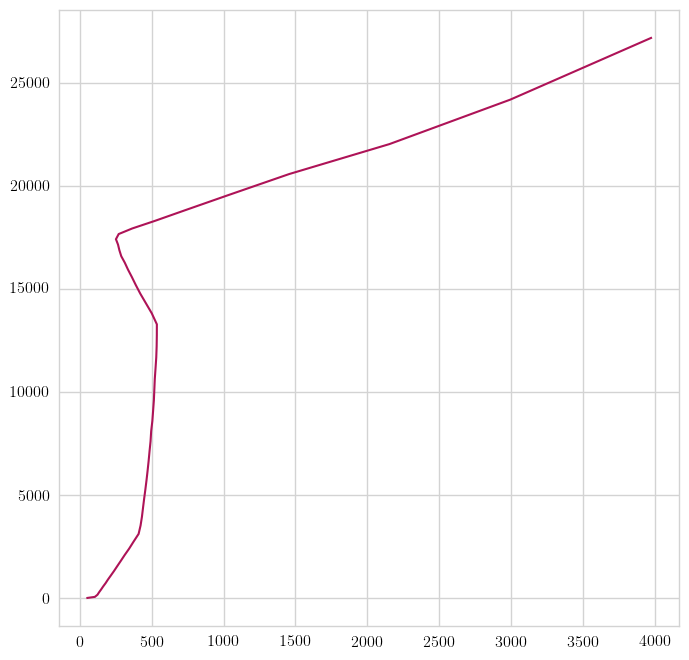

In [257]:
altitude = reference_a["z"]
plt.plot(np.diff(altitude), altitude[:-1])

In [282]:
x

array([0.00010957, 0.00032871, 0.00054786, 0.000767  , 0.00098614,
       0.00120529, 0.00142443, 0.00164357, 0.00186271, 0.00208186])

(0, 4000)

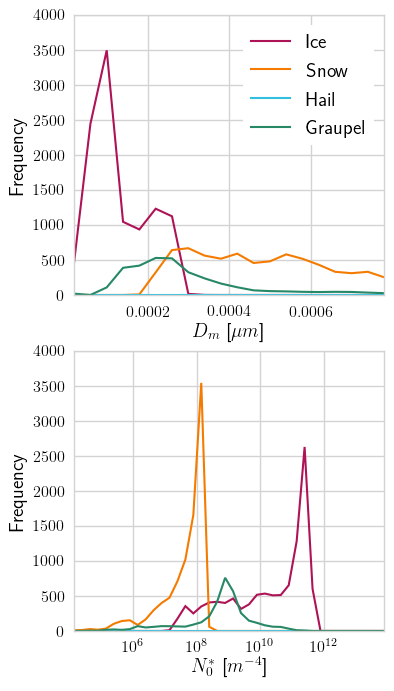

In [302]:
f, axs = plt.subplots(2, 1, figsize = (4, 8))

ax = axs[0]

bins = np.linspace(0, 800e-6, 21)
hs = ["iwc", "swc", "hwc", "gwc"]
qs = ["iwc_dm", "swc_dm", "hwc_dm", "gwc_dm"]
labels = ["Ice", "Snow", "Hail", "Graupel"]

y_tot = None
n_tot = None

for i, q in enumerate(qs):
    wc = reference_a[hs[i]]
    dm = reference_a[q][wc > 1e-6]
    y, x = np.histogram(dm, bins = bins)
    
            
    x = 0.5 * (x[1:] + x[:-1])
    ax.plot(x, y, label = labels[i])
    
ax.set_xlim([x[0], x[-1]])
ax.set_xlabel("$D_m$ [$\mu m$]")
ax.set_ylabel("Frequency")
ax.legend()

ax.set_ylim([0, 4000])

ax = axs[1]
bins = np.logspace(4, 14, 41)
hs = ["iwc", "swc", "hwc", "gwc"]
qs = ["iwc_n0", "swc_n0", "hwc_n0", "gwc_n0"]
labels = ["Ice", "Snow", "Hail", "Graupel"]


for i, q in enumerate(qs):
    wc = reference_a[hs[i]]
    n0 = reference_a[q][wc > 1e-6]
    
    y, x = np.histogram(n0, bins = bins)
    x = 0.5 * (x[1:] + x[:-1])
    ax.plot(x, y, label = labels[i])
    
ax.set_xscale("log")
ax.set_ylabel("Frequency")
ax.set_xlabel("$N_0^*$ [$m^{-4}$]")
ax.set_ylabel("Frequency")
ax.set_xlim([x[0], x[-1]])
ax.set_ylim([0, 4000])
    


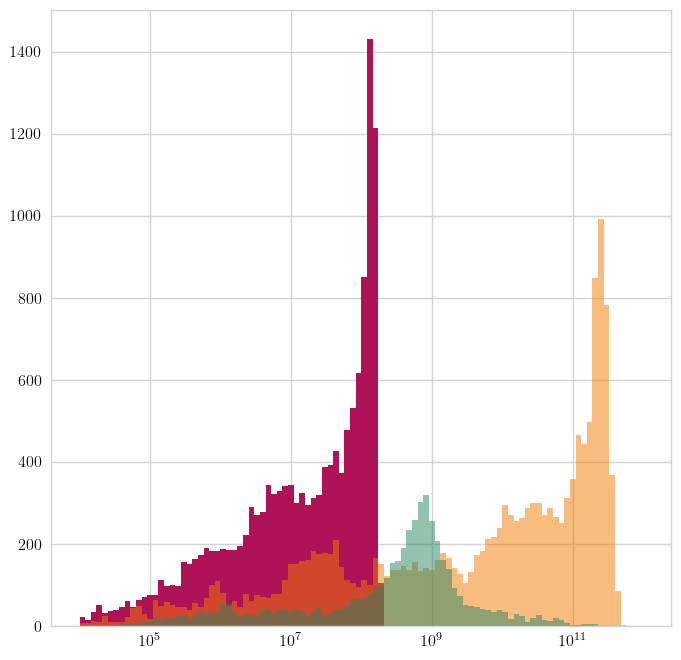

In [248]:
bins = np.logspace(4, 12, 101)

plt.hist(reference_a["swc_n0"].ravel(), bins = bins)
plt.hist(reference_a["iwc_n0"].ravel(), bins = bins, alpha = 0.5)
plt.hist(reference_a["hwc_n0"].ravel(), bins = bins, alpha = 0.5)
plt.hist(reference_a["gwc_n0"].ravel(), bins = bins, alpha = 0.5)
plt.xscale("log")